# MNIST

## Package

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import torch.optim as optim

## Data set

In [3]:
traindata = datasets.MNIST('data/mnist_train', train=True, download=False, transform=transforms.ToTensor()) # download = True to download

len(traindata)

60000

## Sample

In [4]:
img, label = traindata[np.random.randint(0,60000-1)]
print(label)

8


In [5]:
print(img)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [6]:
img.size()

torch.Size([1, 28, 28])

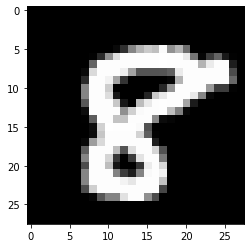

In [7]:
plt.imshow(img.reshape(28,28), cmap='gray')

In [8]:

img_train = img.view(-1).unsqueeze(0)
img_train.size()

torch.Size([1, 784])

## Model

In [11]:

model = nn.Sequential(
        nn.Linear(784, 100),
        nn.ReLU(),
        nn.Linear(100, 10),
        nn.ReLU(),
        nn.Softmax(dim=1))



In [12]:
predict = model(img_train)

print(predict)

predict.size()

tensor([[0.0990, 0.0953, 0.1106, 0.0953, 0.0953, 0.0953, 0.1010, 0.0953, 0.1176,
         0.0953]], grad_fn=<SoftmaxBackward>)


torch.Size([1, 10])

## Loss

### one-hot encoding

In [13]:
label_one_hot = torch.zeros(10).scatter_(0, torch.tensor(label), 1.0).unsqueeze(0)

label, label_one_hot, label_one_hot.size()

(8, tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]), torch.Size([1, 10]))

### Mean square loss

In [14]:
loss = torch.nn.MSELoss()

loss(predict, label_one_hot)

tensor(0.0865, grad_fn=<MseLossBackward>)

## Train

### Data loader

In [15]:
batch_sz = 600
train_loader = torch.utils.data.DataLoader(traindata, batch_size=batch_sz, shuffle=True)

#img, label = next(iter(train_loader))

### Learn rate

In [16]:
learning_rate = 0.5

### Optimizer

In [17]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

### Batch training

In [18]:
n_epochs = 100
for epoch in range(n_epochs):
    epoch_loss = 0
    for img, label in train_loader:
        label_one_hot = torch.zeros(batch_sz, 10).scatter_(1, label.view(batch_sz,1), 1.0)
        predict = model(img.view(batch_sz, -1))
        curr_loss = loss(predict, label_one_hot)
    
        optimizer.zero_grad()
        curr_loss.backward() ## gradient
        optimizer.step()
        
        epoch_loss += curr_loss
    print("Epoch: %d, Loss: %f" % (epoch, float(epoch_loss)))

Epoch: 0, Loss: 8.892522
Epoch: 1, Loss: 8.330291
Epoch: 2, Loss: 7.150600
Epoch: 3, Loss: 5.739855
Epoch: 4, Loss: 4.695155
Epoch: 5, Loss: 3.956642
Epoch: 6, Loss: 3.526677
Epoch: 7, Loss: 3.265595
Epoch: 8, Loss: 3.089252
Epoch: 9, Loss: 2.958390
Epoch: 10, Loss: 2.856035
Epoch: 11, Loss: 2.773375
Epoch: 12, Loss: 2.704956
Epoch: 13, Loss: 2.647665
Epoch: 14, Loss: 2.598173
Epoch: 15, Loss: 2.554990
Epoch: 16, Loss: 2.517343
Epoch: 17, Loss: 2.482929
Epoch: 18, Loss: 2.453019
Epoch: 19, Loss: 2.425304
Epoch: 20, Loss: 2.399795
Epoch: 21, Loss: 2.377005
Epoch: 22, Loss: 2.355065
Epoch: 23, Loss: 2.335252
Epoch: 24, Loss: 2.316506
Epoch: 25, Loss: 2.298632
Epoch: 26, Loss: 2.282248
Epoch: 27, Loss: 2.266181
Epoch: 28, Loss: 2.251186
Epoch: 29, Loss: 2.237334
Epoch: 30, Loss: 2.223519
Epoch: 31, Loss: 2.210387
Epoch: 32, Loss: 2.197921
Epoch: 33, Loss: 2.185833
Epoch: 34, Loss: 2.174633
Epoch: 35, Loss: 2.163684
Epoch: 36, Loss: 2.153166
Epoch: 37, Loss: 2.142149
Epoch: 38, Loss: 2.132

## Test accuracy

### Test set

0


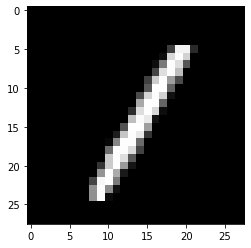

In [22]:
testdata = datasets.MNIST('data/mnist_test', train=False, download=False, transform=transforms.ToTensor()) # download=True to download, train=False means test set

test_loader = torch.utils.data.DataLoader(testdata, batch_size=1, shuffle=True)

img, label = next(iter(test_loader))

predict = model(img.view(-1).unsqueeze(0))

_, predicted_label = torch.max(predict, dim=1)

print(predicted_label.item())

plt.imshow(img.reshape(28,28), cmap='gray')


## Visualization

In [23]:
!rm -rf runs
writer = SummaryWriter('runs/mnist')

### add loss

In [24]:
n_epochs = 10
learning_rate = 0.1
for epoch in range(n_epochs):
    epoch_loss = 0
    for img, label in train_loader:
        label_one_hot = torch.zeros(batch_sz, 10).scatter_(1, label.view(batch_sz,1), 1.0)
        predict = model(img.view(batch_sz, -1))
        curr_loss = loss(predict, label_one_hot)
    
        optimizer.zero_grad()
        curr_loss.backward()
        optimizer.step()
        
        epoch_loss += curr_loss
    
    writer.add_scalar("Loss/train", epoch_loss, epoch)
    print("Epoch: %d, Loss: %f" % (epoch, float(epoch_loss)))

Epoch: 0, Loss: 1.740267
Epoch: 1, Loss: 1.736325
Epoch: 2, Loss: 1.731875
Epoch: 3, Loss: 1.727823
Epoch: 4, Loss: 1.723512
Epoch: 5, Loss: 1.719495
Epoch: 6, Loss: 1.715571
Epoch: 7, Loss: 1.711490
Epoch: 8, Loss: 1.707280
Epoch: 9, Loss: 1.703824


### add model

In [25]:
img, _ = next(iter(train_loader))
writer.add_graph(model, img.view(batch_sz,-1))

In [26]:
writer.flush()
writer.close()

In [62]:
!tensorboard --logdir=runs/mnist

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C
